**ALTERNATE CODE FOR GETTING DATASET, NOT USED IN MY FINAL CODE**

In [ ]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
    
if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)

    # save images to disk
    save_images(images, labels)

In [ ]:
labels.shape

(5000,)

In [ ]:
images.shape

(5000, 96, 96, 3)

**LOADING DATASET WITH TENSORFLOW DATASETS**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

**TRAIN DATASET**

In [ ]:
labelled_train, info = (tfds.load('stl10', split='train', with_info=True, as_supervised=True))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stl10/1.0.0.incompleteE7AQHT/stl10-train.tfrecord


  0%|          | 0/5000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stl10/1.0.0.incompleteE7AQHT/stl10-test.tfrecord


  0%|          | 0/8000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stl10/1.0.0.incompleteE7AQHT/stl10-unlabelled.tfrecord


  0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset stl10 downloaded and prepared to /root/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


**STL10 DATASET INFO**

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='stl10',
    version=1.0.0,
    description='The STL-10 dataset is an image recognition dataset for developing unsupervised
feature learning, deep learning, self-taught learning algorithms. It is inspired
by the CIFAR-10 dataset but with some modifications. In particular, each class
has fewer labeled training examples than in CIFAR-10, but a very large set of 
unlabeled examples is provided to learn image models prior to supervised
training. The primary challenge is to make use of the unlabeled data (which
comes from a similar but different distribution from the labeled data) to build
a useful prior. All images were acquired from labeled examples on ImageNet.',
    homepage='http://ai.stanford.edu/~acoates/stl10/',
    features=FeaturesDict({
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=113000,
    splits={
        'test': 8000,
        'tr

**VIEWING FIRSTFEW IMAGES AND LABELS**

,image,label
0,,1 (bird)
1,,0 (airplane)
2,,8 (ship)
3,,3 (cat)
4,,9 (truck)

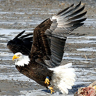
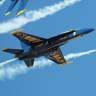
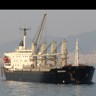
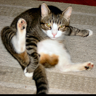
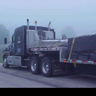

In [ ]:
tfds.as_dataframe(labelled_train.take(5), info)
# EXTREMELY RARE PARKOUR CAT AT 3

**SHUFFLING AND BATCHING THE DATA**

In [ ]:
unlabelled_dataset_size = 100000
labelled_dataset_size = 5000
image_size = 96
image_channels = 3

num_epochs = 20
batch_size = 525  # Corresponds to 200 steps per epoch
width = 128
temperature = 0.1

steps_per_epoch = (unlabelled_dataset_size + labelled_dataset_size) // batch_size
unlabelled_batch_size = unlabelled_dataset_size // steps_per_epoch
labelled_batch_size = labelled_dataset_size // steps_per_epoch

labelled_train = (
        tfds.load("stl10", split="train", as_supervised=True, shuffle_files=True)
        .shuffle(buffer_size=10 * labelled_batch_size)
        .batch(labelled_batch_size)
    )

In [ ]:
print(labelled_train)

<BatchDataset shapes: ((None, 96, 96, 3), (None,)), types: (tf.uint8, tf.int64)>


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

**SIMPLE SUPERVISED CNN**

In [ ]:
simple_model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255, input_shape = (96, 96, 3)),                                 

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0

In [ ]:
simple_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
train = labelled_train.take(160)
val = labelled_train.skip(160)

In [ ]:
y_train = np.concatenate([y for x, y in train], axis=0)
x_train = np.concatenate([x for x, y in train], axis=0)
x_train.shape

(4000, 96, 96, 3)

In [ ]:
y_train.shape

(4000,)

In [ ]:
x_val = np.concatenate([x for x, y in val], axis=0)
y_val = np.concatenate([y for x, y in val], axis=0)
x_val.shape

(1000, 96, 96, 3)

In [ ]:
y_val.shape

(1000,)

In [ ]:
simple_model.fit(
    train, epochs=10, validation_data=val, verbose=1
)

Epoch 1/10
160/160 [==============================] - 62s 378ms/step - loss: 1.8463 - acc: 0.3100 - val_loss: 1.6100 - val_acc: 0.4110
Epoch 2/10
160/160 [==============================] - 56s 349ms/step - loss: 1.4939 - acc: 0.4580 - val_loss: 1.5037 - val_acc: 0.4360
Epoch 3/10
160/160 [==============================] - 54s 336ms/step - loss: 1.3291 - acc: 0.5210 - val_loss: 1.4208 - val_acc: 0.4880
Epoch 4/10
160/160 [==============================] - 54s 334ms/step - loss: 1.1854 - acc: 0.5638 - val_loss: 1.2864 - val_acc: 0.5100
Epoch 5/10
160/160 [==============================] - 54s 336ms/step - loss: 1.0541 - acc: 0.6195 - val_loss: 1.3235 - val_acc: 0.5120
Epoch 6/10
160/160 [==============================] - 54s 338ms/step - loss: 0.9216 - acc: 0.6715 - val_loss: 1.3216 - val_acc: 0.5330
Epoch 7/10
160/160 [==============================] - 54s 338ms/step - loss: 0.7601 - acc: 0.7283 - val_loss: 1.2932 - val_acc: 0.5660
Epoch 8/10
160/160 [==============================] - 5

**EVALUATING MODEL ON TEST SET**

In [ ]:
test = (
        tfds.load("stl10", split="test", as_supervised=True)
        .batch(batch_size)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
    )

In [ ]:
y_test = np.concatenate([y for x, y in test], axis=0)
x_test = np.concatenate([x for x, y in test], axis=0)

In [ ]:
x_test.shape

(8000, 96, 96, 3)

In [ ]:
y_test.shape

(8000,)

Accuracy hovers around 52-53%

In [ ]:

simple_model.evaluate(test)

16/16 [==============================] - 25s 1s/step - loss: 1.8905 - acc: 0.5242


[1.8904958963394165, 0.5242499709129333]

**TRYING RESNET**

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
IMAGE_SIZE = 100
def pre_process_image(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 255.0
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  return image, label

In [ ]:
restrain = tfds.load('stl10', split='train', as_supervised=True)
resval = restrain.skip(4000)
restrain = restrain.take(4000)
restrain = restrain.map(pre_process_image).shuffle(1000).repeat().batch(64)
resval = resval.map(pre_process_image).repeat().batch(1000)

In [ ]:
res_net = ResNet50(weights = 'imagenet', include_top = False, input_shape = (100, 100, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
res_net.trainable = False
global_average_layer = layers.GlobalAveragePooling2D()
output_layer = layers.Dense(10, activation='softmax')
res_model = tf.keras.Sequential([
  res_net,
  global_average_layer,
  output_layer
])

In [ ]:
res_model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [ ]:
res_model.fit(restrain, validation_data = resval, verbose = 1, steps_per_epoch = 23262//64, epochs = 7, validation_steps = 10)

Epoch 1/7
363/363 [==============================] - 1294s 4s/step - loss: 2.0913 - acc: 0.2271 - val_loss: 1.9573 - val_acc: 0.2930
Epoch 2/7
363/363 [==============================] - 1307s 4s/step - loss: 1.9107 - acc: 0.3051 - val_loss: 1.8761 - val_acc: 0.3190
Epoch 3/7
363/363 [==============================] - 1327s 4s/step - loss: 1.8280 - acc: 0.3492 - val_loss: 1.8141 - val_acc: 0.3200
Epoch 4/7
363/363 [==============================] - 1324s 4s/step - loss: 1.7743 - acc: 0.3698 - val_loss: 1.7741 - val_acc: 0.3790
Epoch 5/7
363/363 [==============================] - 1315s 4s/step - loss: 1.7367 - acc: 0.3787 - val_loss: 1.8005 - val_acc: 0.3280
Epoch 6/7
363/363 [==============================] - 1318s 4s/step - loss: 1.6970 - acc: 0.3968 - val_loss: 1.7119 - val_acc: 0.3800
Epoch 7/7
363/363 [==============================] - 1330s 4s/step - loss: 1.6762 - acc: 0.4036 - val_loss: 1.7197 - val_acc: 0.3710


In [ ]:
restest = test.map(pre_process_image)
res_model.evaluate(restest)

16/16 [==============================] - 307s 19s/step - loss: 1.7031 - acc: 0.3798


[1.7031431198120117, 0.37975001335144043]

**IMPLEMENTING PSEUDO LABELLING**

In [ ]:
 x_pseudo, y_pseudo = simple_model.predict()

**SIMCLR**